<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_7/Airbnb_Data_Preparation_EDA_Visualizatoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            IsolationForest, VotingRegressor)
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from ydata_profiling import ProfileReport  # Updated import
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class
import warnings
warnings.filterwarnings('ignore')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import auc
from scipy.interpolate import interp1d  # Import interp1d from the correct location

In [5]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv.zip to AB_NYC_2019.csv.zip


In [7]:
# Extract Zip File

import zipfile
import os

zip_path = '/content/AB_NYC_2019.csv.zip'
extraction_path = '/content/unzipped_files'


os.makedirs(extraction_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Files extracted successfully:")
# Print the files extracted
!ls {extraction_path}

Files extracted successfully:
AB_NYC_2019.csv


In [10]:
# Load the dataset
file_path = '/content/unzipped_files/AB_NYC_2019.csv'
data = pd.read_csv(file_path)

In [9]:
# Display the first few rows
print(data.head())

    id                         name                        host_id  \
0  2539                Clean & quiet apt home by the park   2787     
1  2595                             Skylit Midtown Castle   2845     
2  3647               THE VILLAGE OF HARLEM....NEW YORK !   4632     
3  3831                   Cozy Entire Floor of Brownstone   4869     
4  5022  Entire Apt: Spacious Studio/Loft by central park   7192     

   host_name   neighbourhood_group neighbourhood  latitude  longitude  \
0         John        Brooklyn        Kensington  40.64749 -73.97237    
1     Jennifer       Manhattan           Midtown  40.75362 -73.98377    
2    Elisabeth       Manhattan            Harlem  40.80902 -73.94190    
3  LisaRoxanne        Brooklyn      Clinton Hill  40.68514 -73.95976    
4        Laura       Manhattan       East Harlem  40.79851 -73.94399    

     room_type      price  minimum_nights  number_of_reviews last_review  \
0     Private room   149          1                 9         20

In [11]:
# Get an overview of data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
# Summary statistics for numerical columns
print(data.describe())

            id          host_id      latitude      longitude       price     \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count   48895.000000     48895.000000       38843.000000      
mean        7.029962        23.274466           1.373221      
std        20.510550        44.550582           1.680442      
min         1.000000         0.00000

In [13]:
# Calculate the percentage of missing values per column
missing_values = data.isnull().mean() * 100
print(missing_values[missing_values > 0])

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64


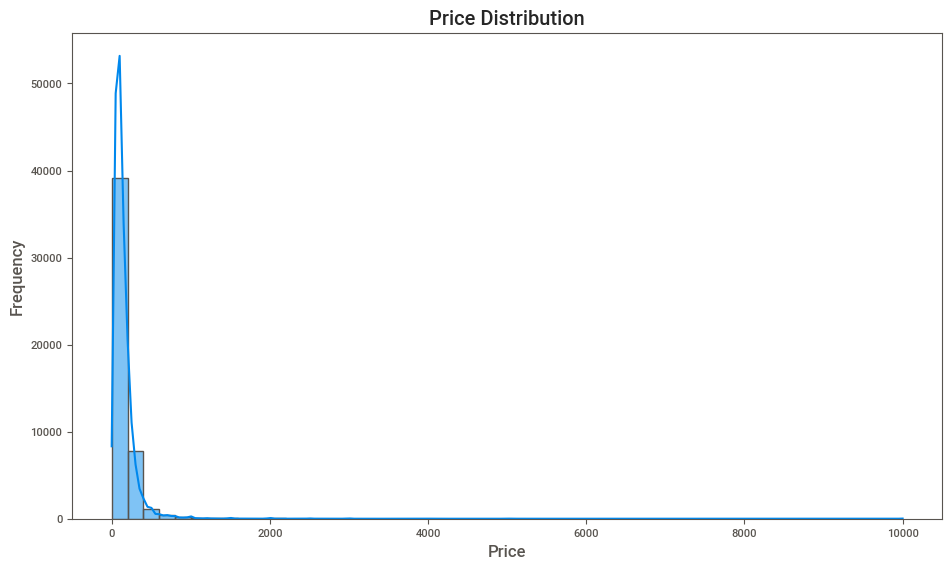

<Figure size 640x480 with 0 Axes>

In [16]:
# Distribution of Prices
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
plt.savefig('price_distribution.png')

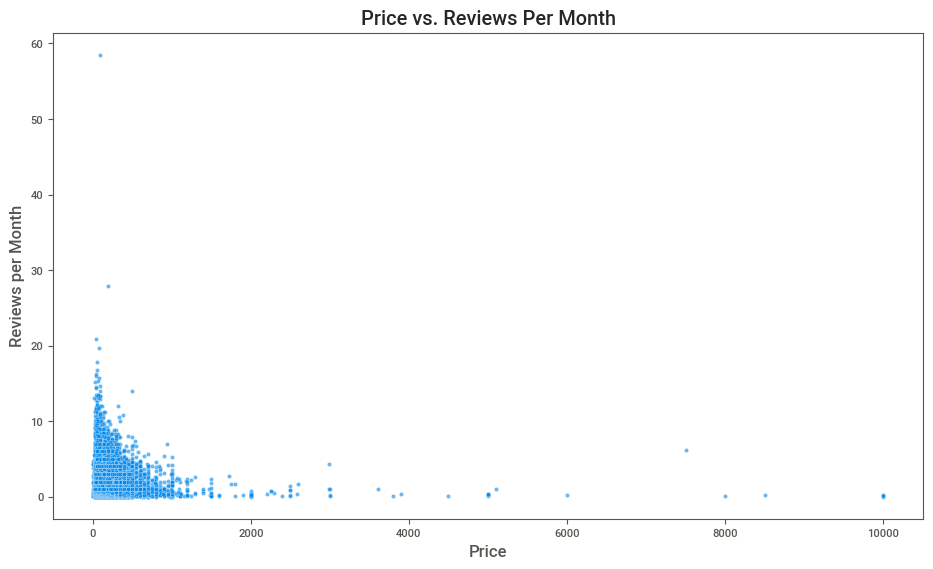

<Figure size 640x480 with 0 Axes>

In [17]:
# Reviews per Month
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews_per_month', data=data, alpha=0.6)
plt.title('Price vs. Reviews Per Month')
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.show()
plt.savefig('reviews.png')

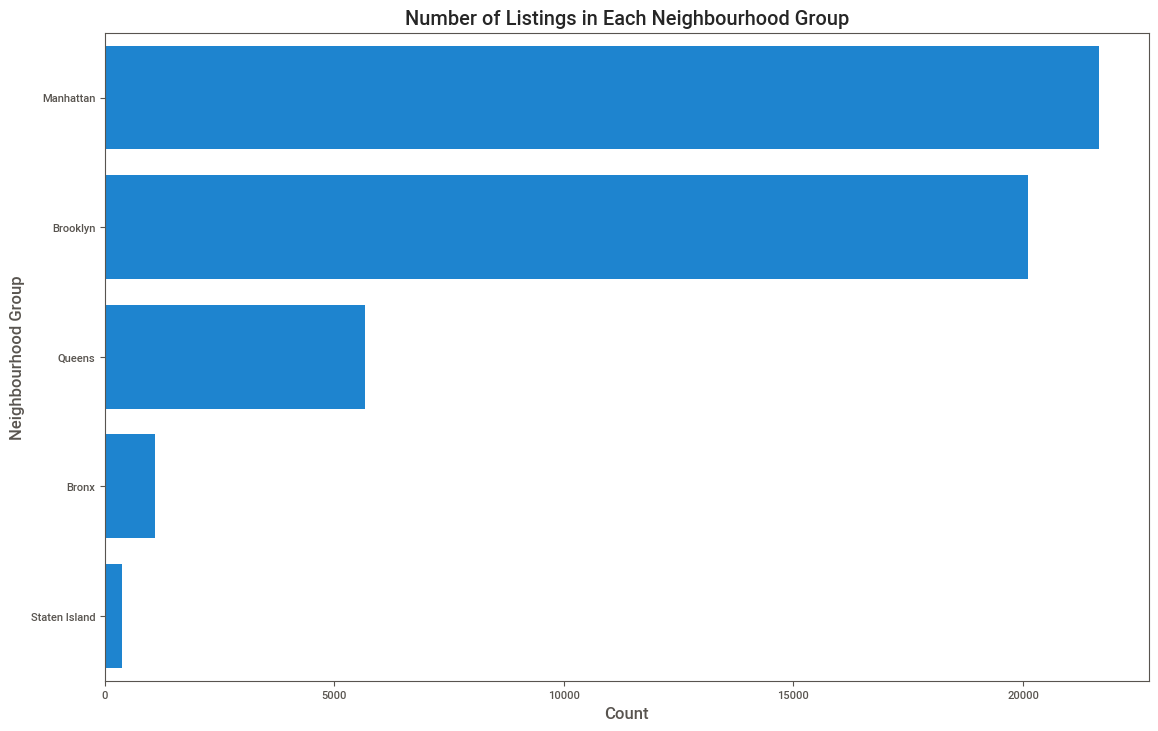

<Figure size 640x480 with 0 Axes>

In [18]:
# Neighbourhood Listings
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood_group', data=data, order = data['neighbourhood_group'].value_counts().index)
plt.title('Number of Listings in Each Neighbourhood Group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.show()
plt.savefig('neighbourhood_listings.png')

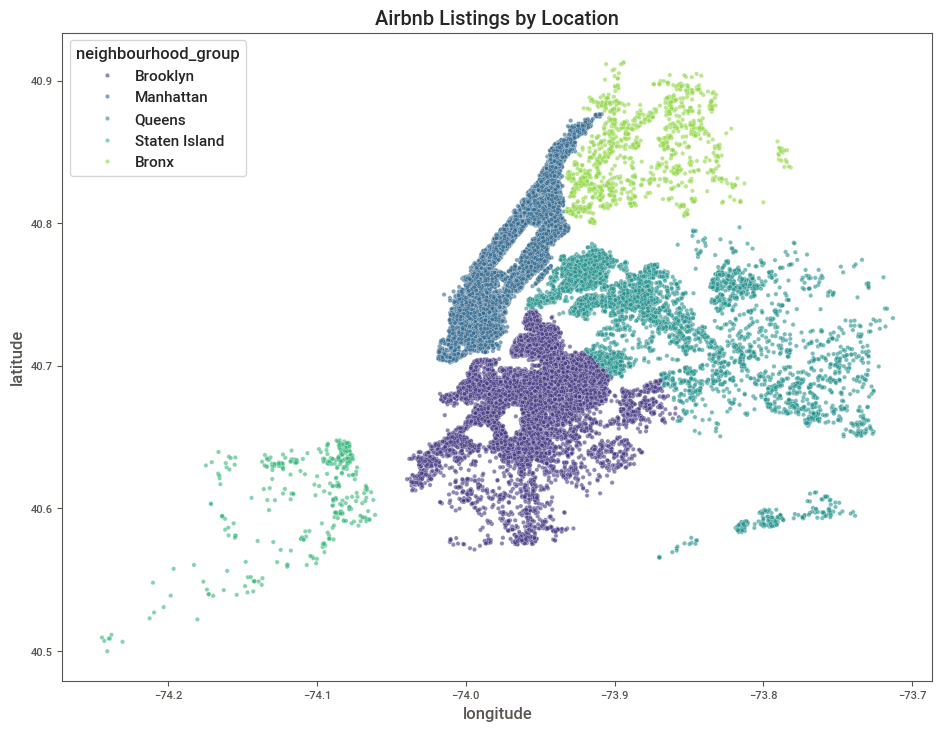

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, hue='neighbourhood_group', palette='viridis', s=10, alpha=0.6)
plt.title('Airbnb Listings by Location')
plt.show()
plt.savefig('listingsbyloc.png')

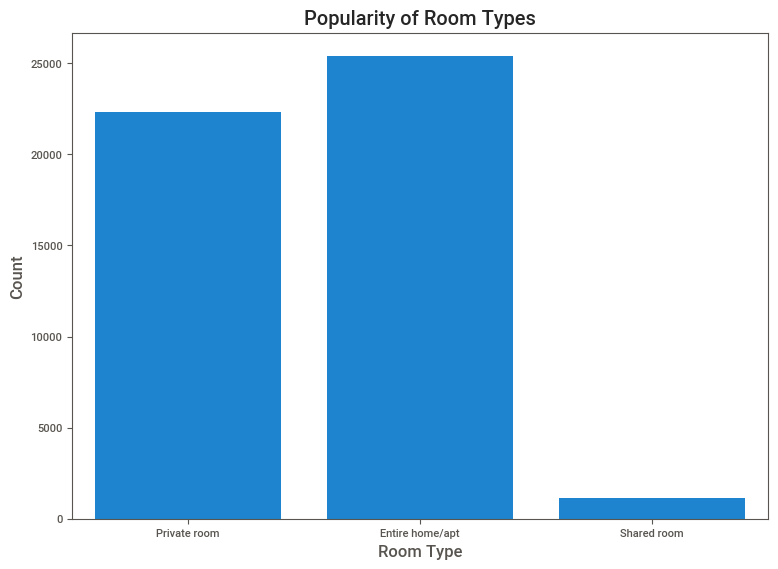

<Figure size 640x480 with 0 Axes>

In [20]:
# Room Type Popularity
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=data)
plt.title('Popularity of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()
plt.savefig('room_popularity.png')

In [21]:
# Check for missing values
print(data.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [22]:
# Handling missing values - Example: Dropping rows with missing 'reviews_per_month'
data['reviews_per_month'].fillna(0, inplace=True)

In [23]:
# Dropping any unnecessary columns if needed
data.drop(columns=['last_review'], inplace=True)

In [24]:
# Confirm changes
print(data.isnull().sum())

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


In [25]:
data = pd.get_dummies(data, columns=['neighbourhood_group'], drop_first=True)

# Example of label encoding for 'room_type'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['room_type'] = le.fit_transform(data['room_type'])

# Check the transformation
print(data.head())

    id                         name                        host_id  \
0  2539                Clean & quiet apt home by the park   2787     
1  2595                             Skylit Midtown Castle   2845     
2  3647               THE VILLAGE OF HARLEM....NEW YORK !   4632     
3  3831                   Cozy Entire Floor of Brownstone   4869     
4  5022  Entire Apt: Spacious Studio/Loft by central park   7192     

   host_name   neighbourhood  latitude  longitude  room_type  price  \
0         John    Kensington  40.64749 -73.97237       1       149    
1     Jennifer       Midtown  40.75362 -73.98377       0       225    
2    Elisabeth        Harlem  40.80902 -73.94190       1       150    
3  LisaRoxanne  Clinton Hill  40.68514 -73.95976       0        89    
4        Laura   East Harlem  40.79851 -73.94399       0        80    

   minimum_nights  number_of_reviews  reviews_per_month  \
0         1                 9               0.21          
1         1                45     

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Assuming we want to scale price and latitude and longitude for some reason
data[['price', 'latitude', 'longitude']] = scaler.fit_transform(data[['price', 'latitude', 'longitude']])

# Check scaled features
print(data[['price', 'latitude', 'longitude']].head())

     price   latitude  longitude
0 -0.015493 -1.493849 -0.437652 
1  0.300974  0.452436 -0.684639 
2 -0.011329  1.468399  0.222497 
3 -0.265335 -0.803398 -0.164450 
4 -0.302811  1.275660  0.177216 


In [27]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = '/content/cleaned_AB_NYC_2019.csv'
data.to_csv(cleaned_file_path, index=False)

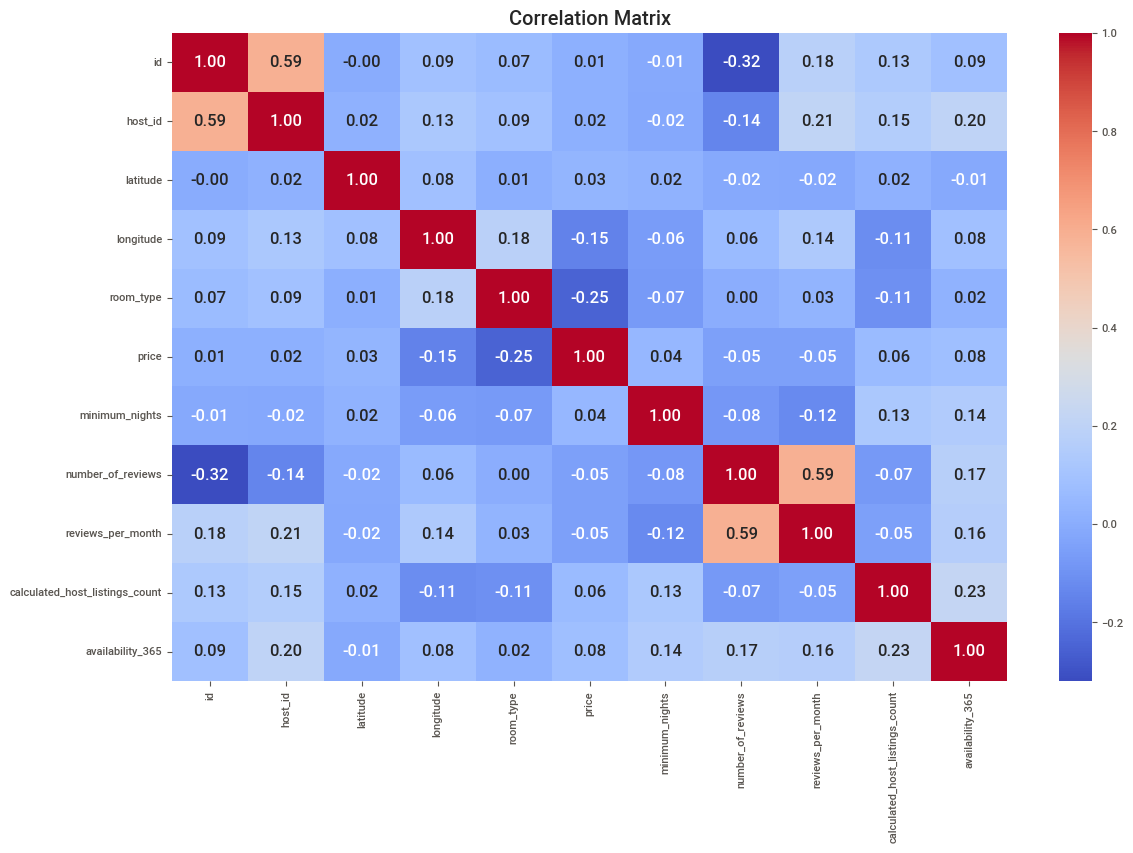

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
# Excluding non-numeric columns from the correlation calculation
numeric_df = data.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = numeric_df.corr()

# Plot the correlation matrix for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [29]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Assuming 'data' contains all necessary numerical features for outlier detection

X = data.copy()  # Use copy to avoid modifying the original df

# Select only numerical columns for Isolation Forest
numerical_features = X.select_dtypes(include=['number']).columns
X_numerical = X[numerical_features]

# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = imputer.fit_transform(X_numerical)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict anomalies using only numerical features
# Use the imputed data for fitting
data['anomaly'] = iso_forest.fit_predict(X_numerical_imputed)

# Extract the outliers
outliers = data[data['anomaly'] == -1]


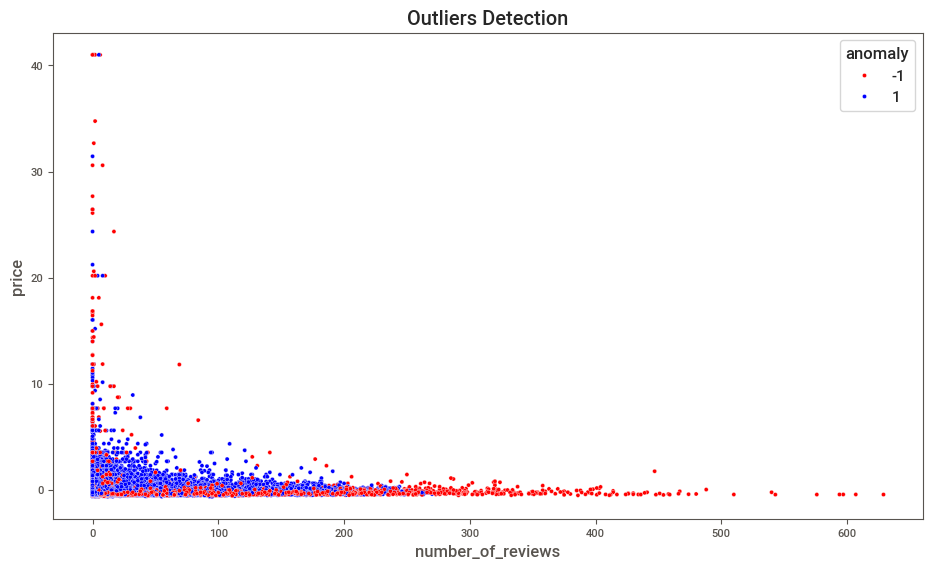

In [30]:
# Plot outliers for visual inspection
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='number_of_reviews', y='price', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Outliers Detection')
plt.show()


In [31]:
# Prepare and scale the data
# Focus on a subset of relevant features
data = data[['price', 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month']]

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

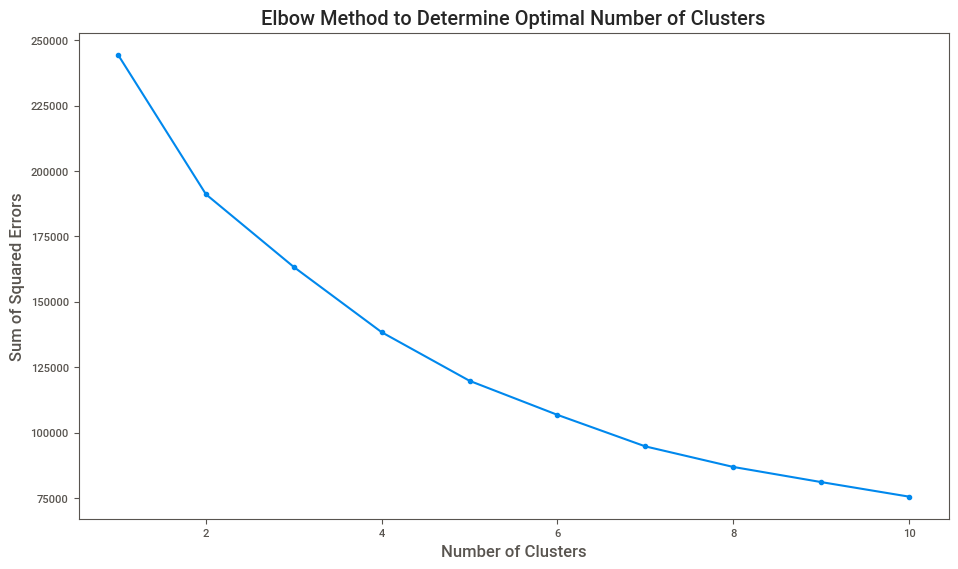

In [32]:
# Determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [33]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster IDs to the original data
data['Cluster'] = clusters

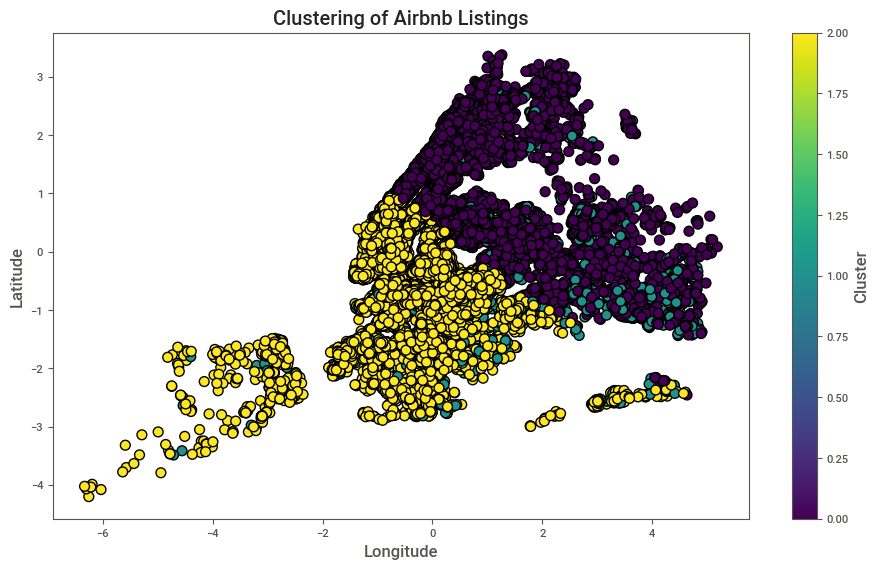

           price   latitude  longitude  number_of_reviews  reviews_per_month
Cluster                                                                     
0       -0.156970  1.087557  0.663059       12.044603          0.726474     
1       -0.108099 -0.124122  0.200082      100.758062          3.948917     
2        0.092275 -0.430380 -0.328386        9.482134          0.561115     


In [34]:
# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='black', s=50)
plt.title('Clustering of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

# Analyze cluster properties
print(data.groupby('Cluster').mean())

In [14]:
report = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)


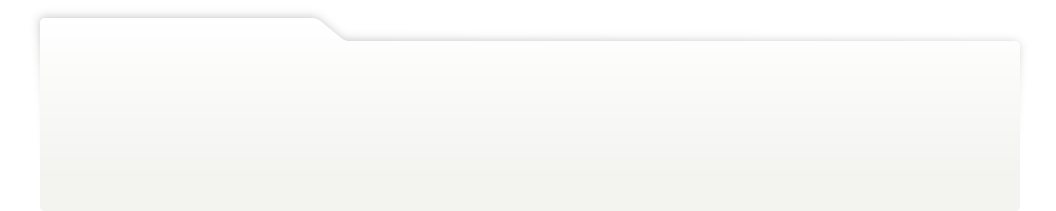
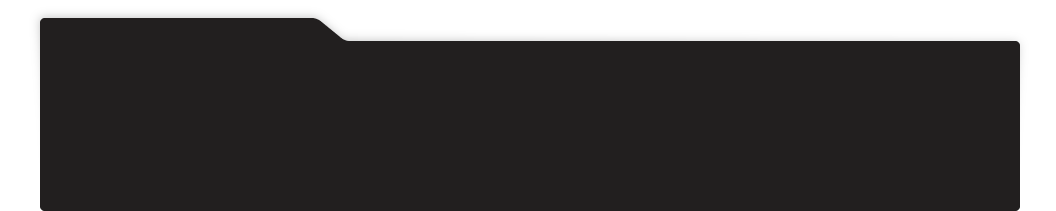
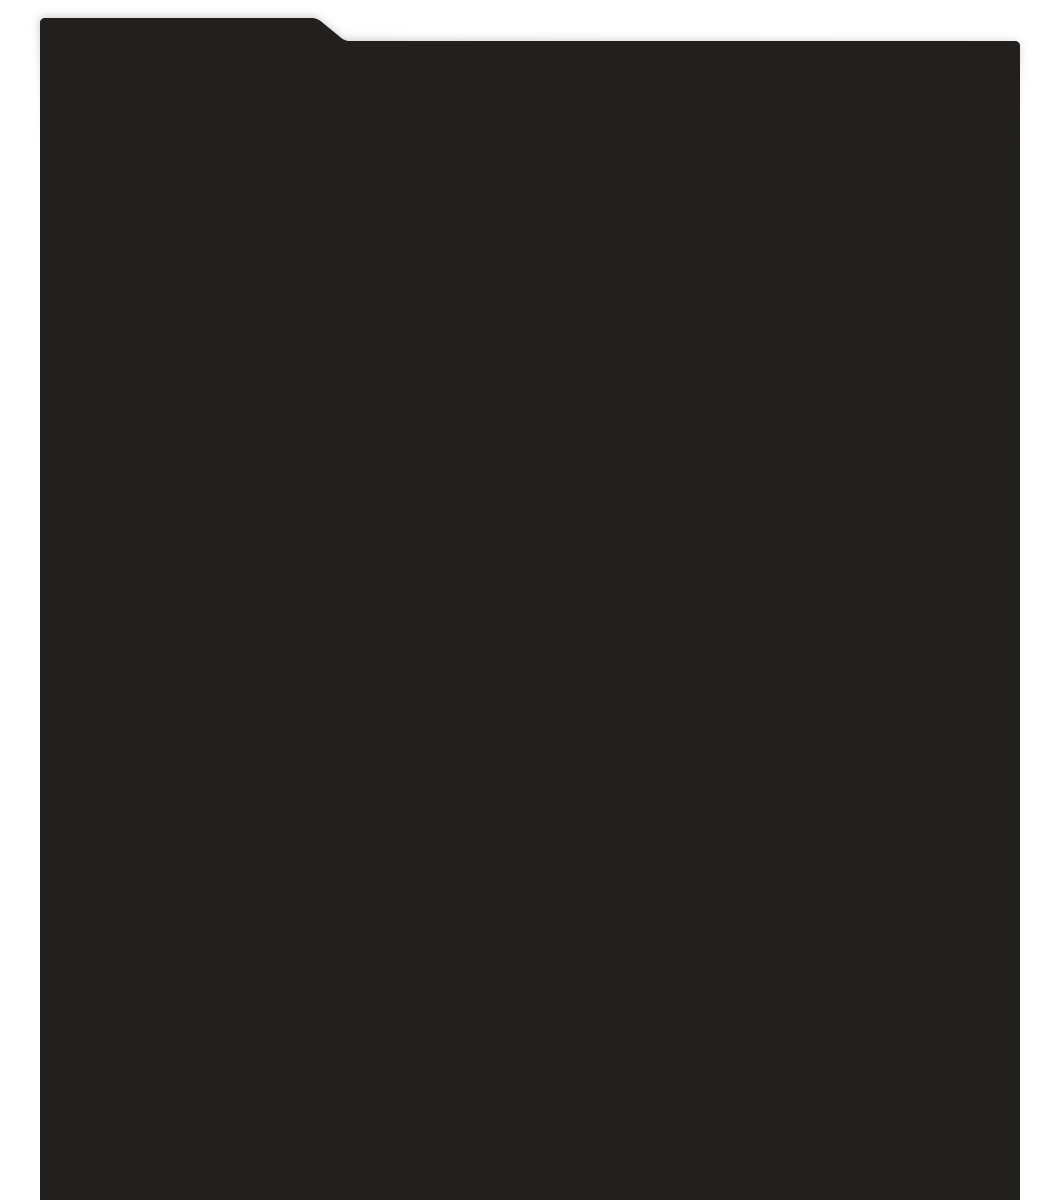
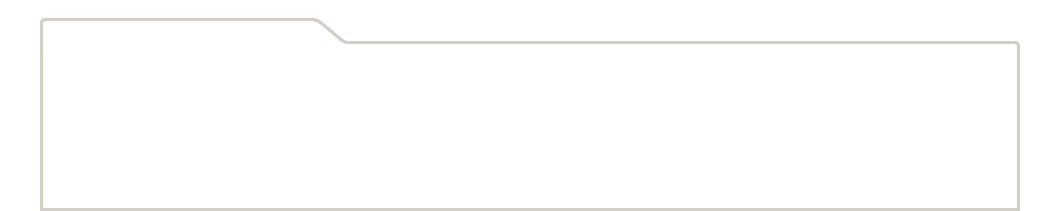
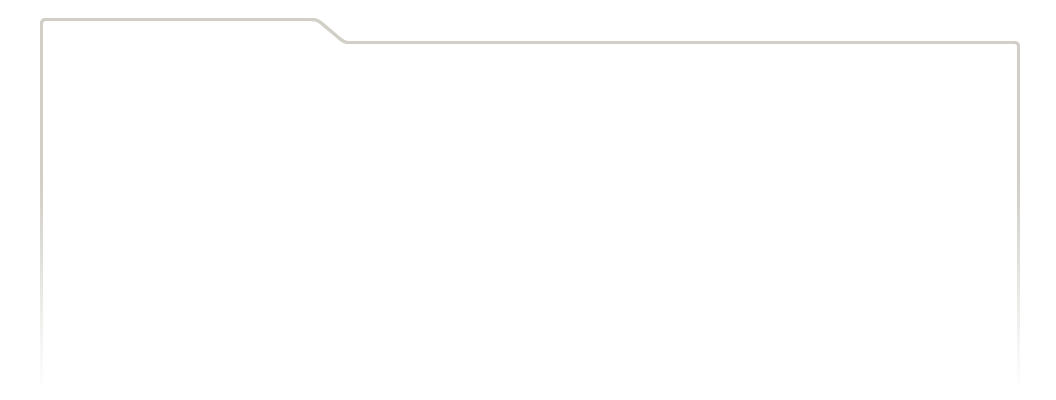
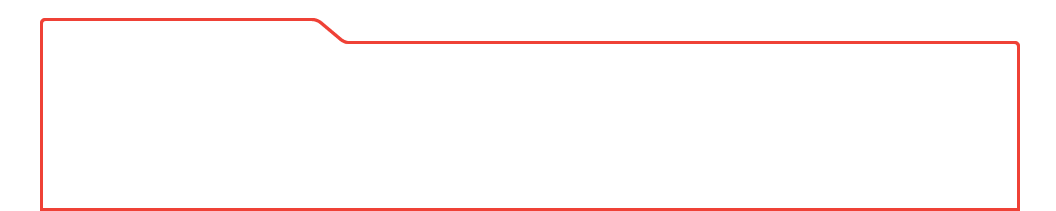
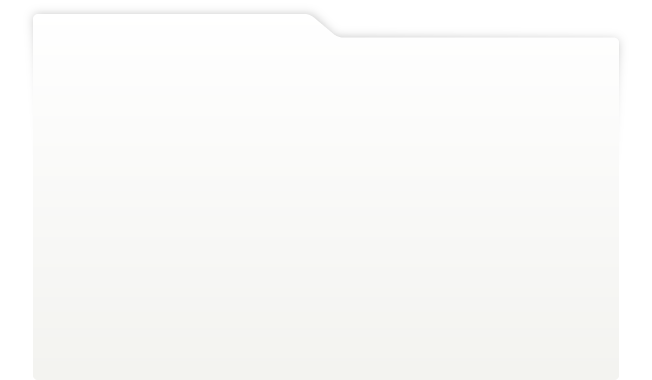
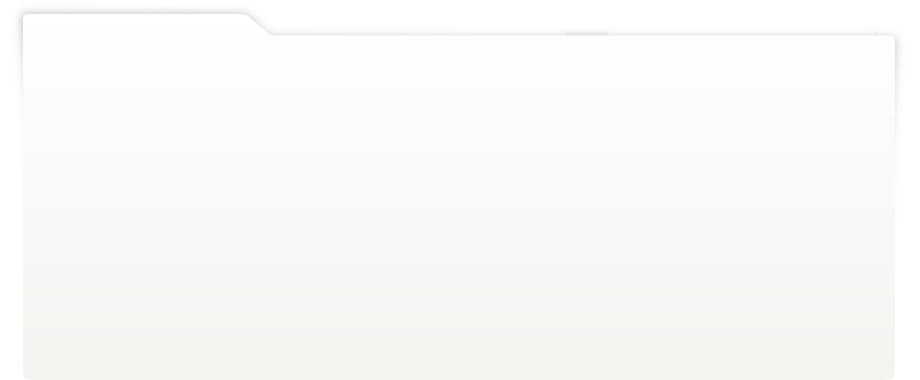
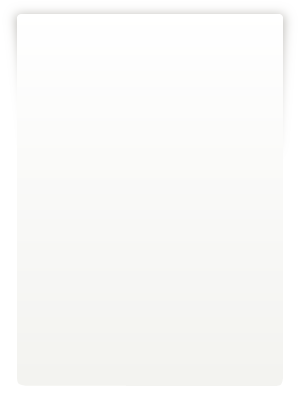
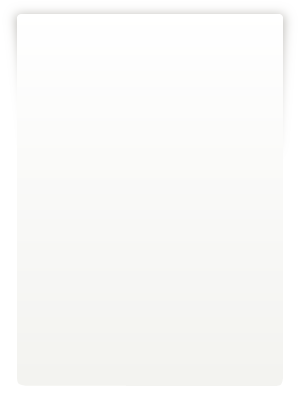
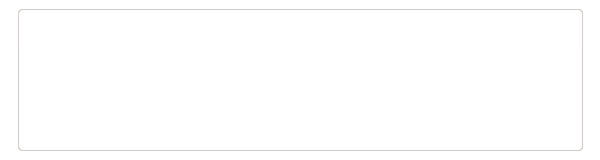
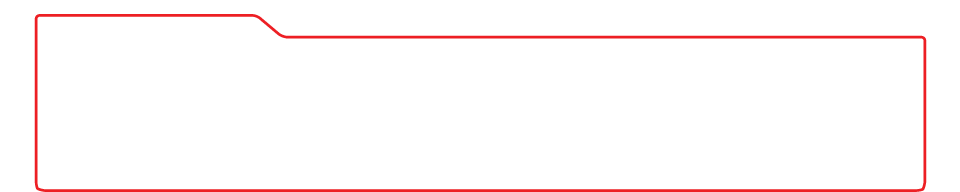
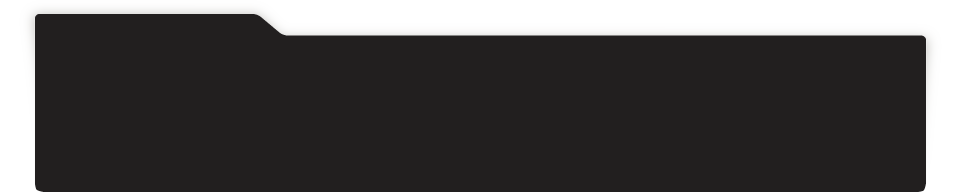
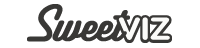
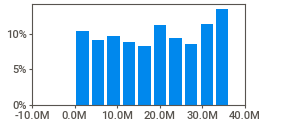
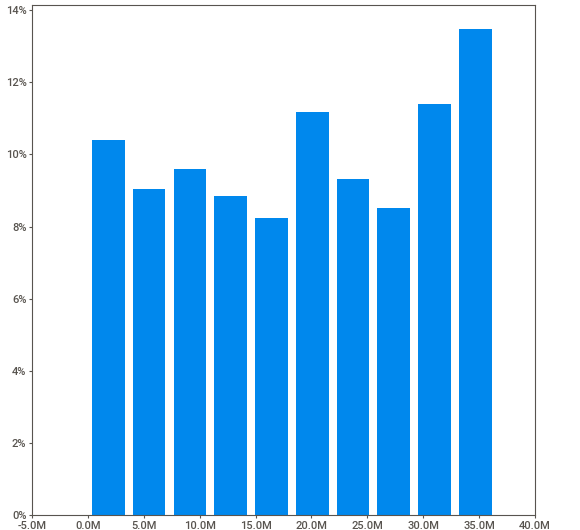
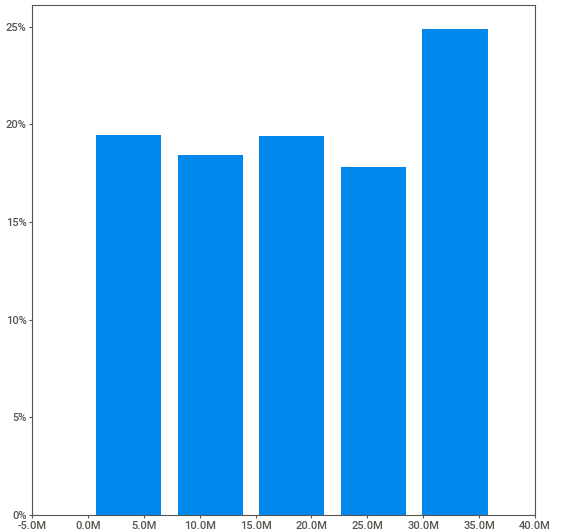
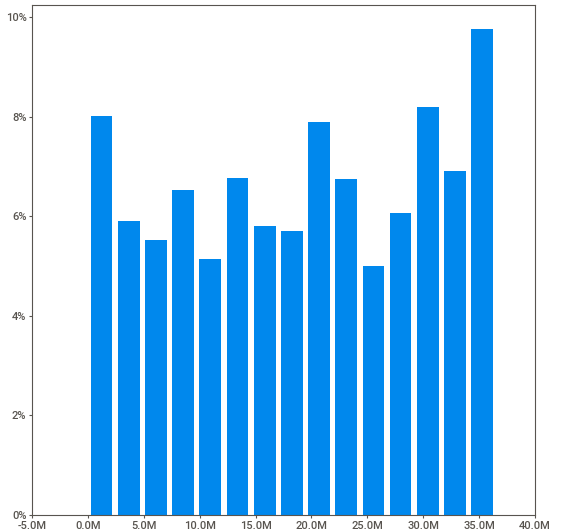
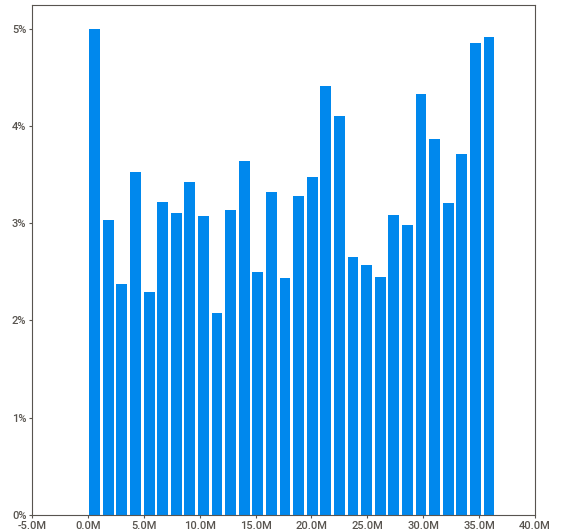
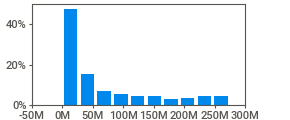
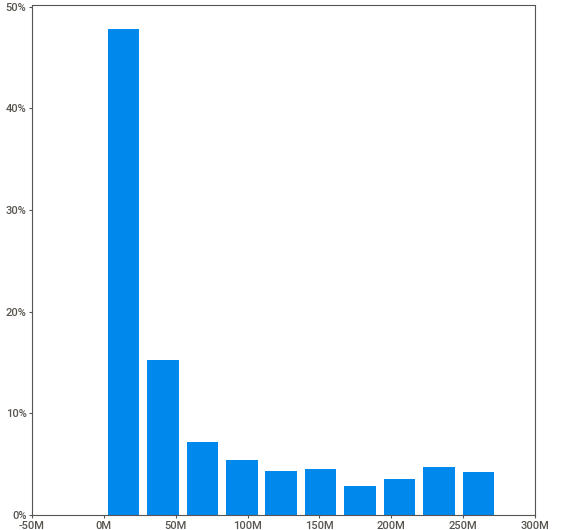
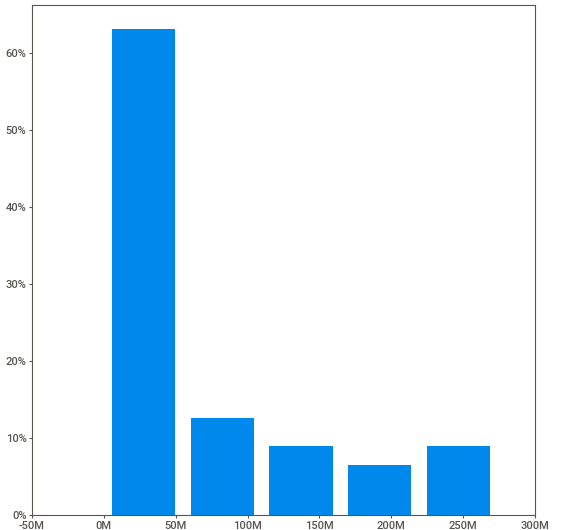
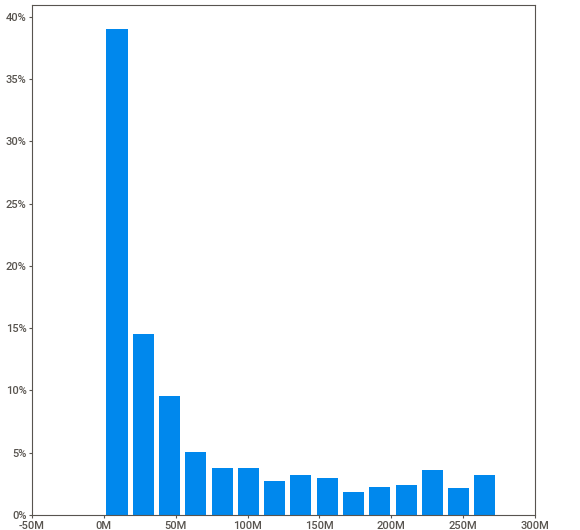
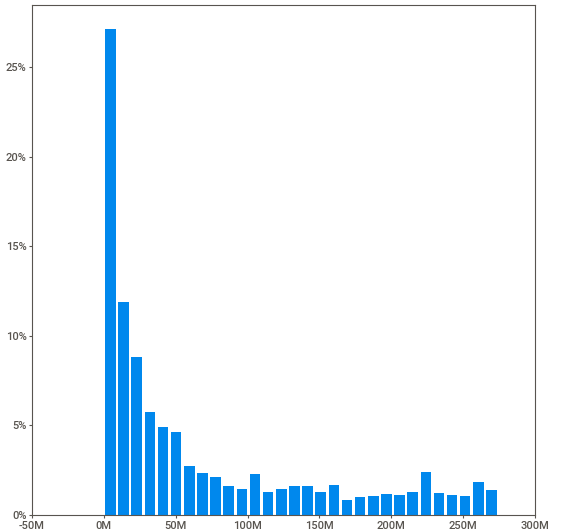
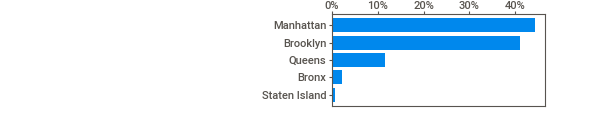
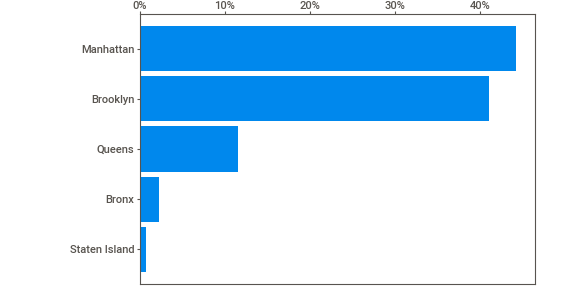
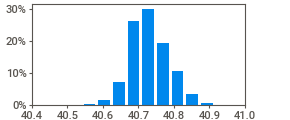
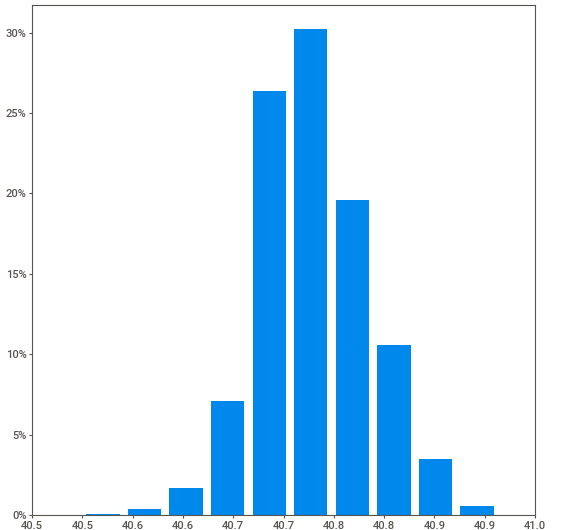
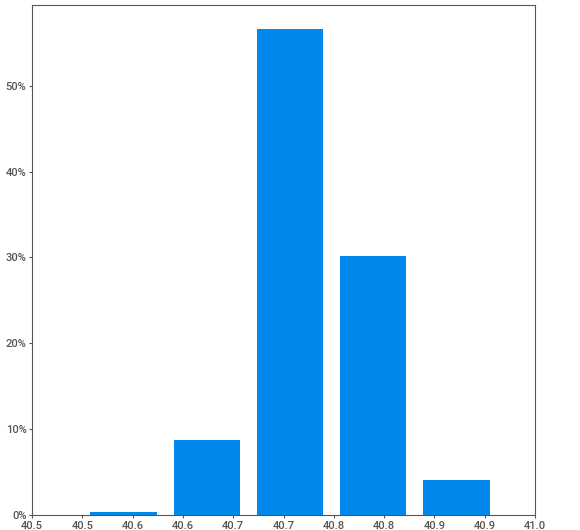
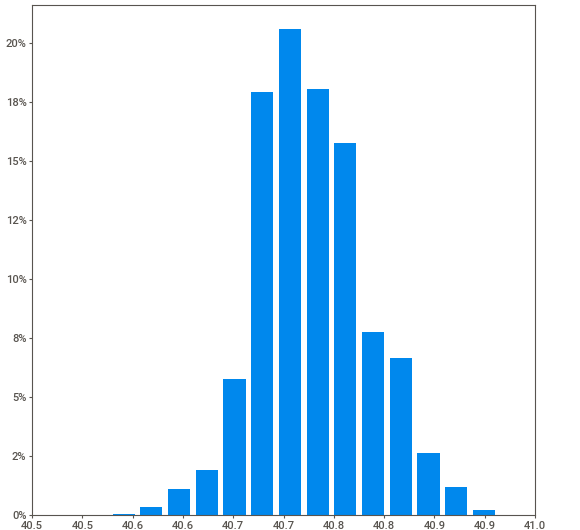
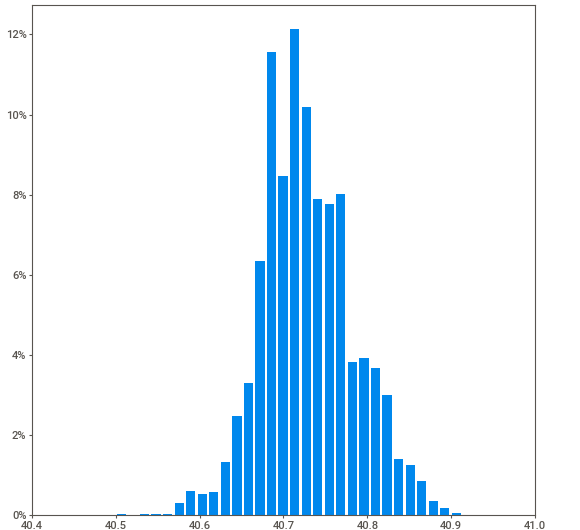
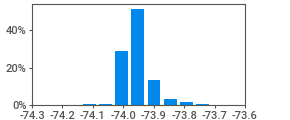
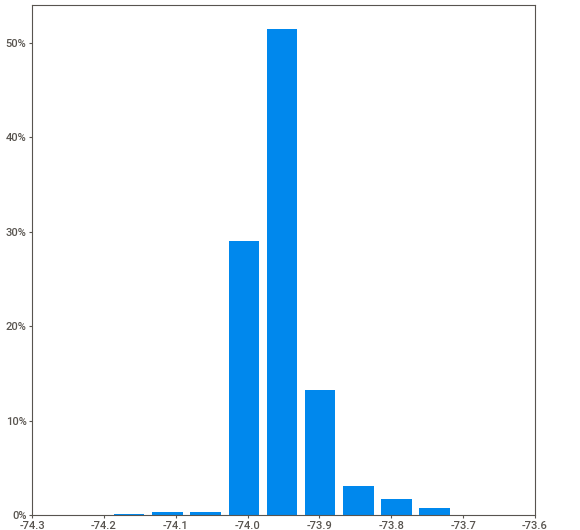
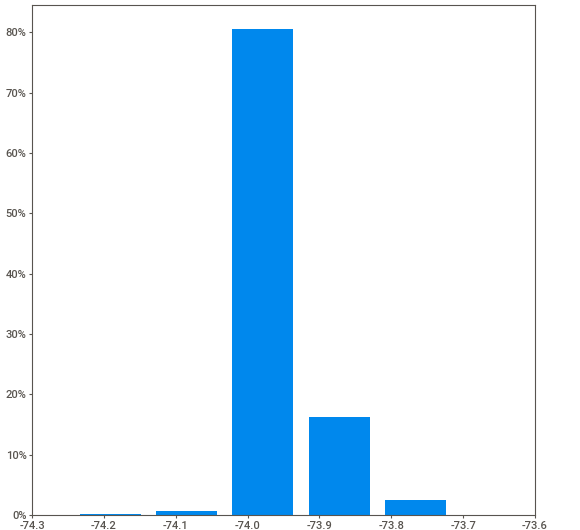
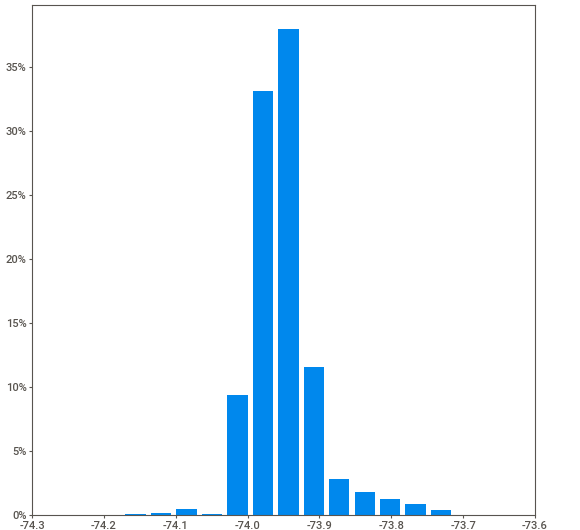
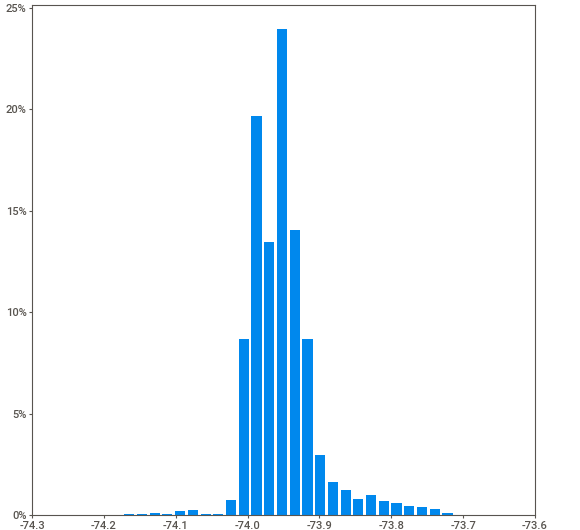
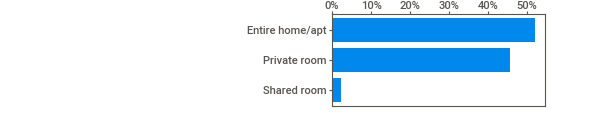
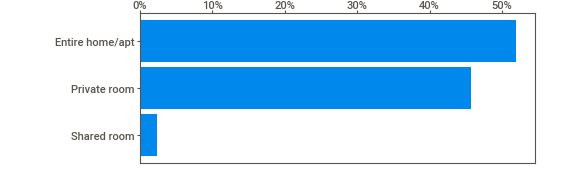
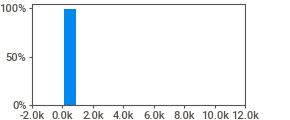
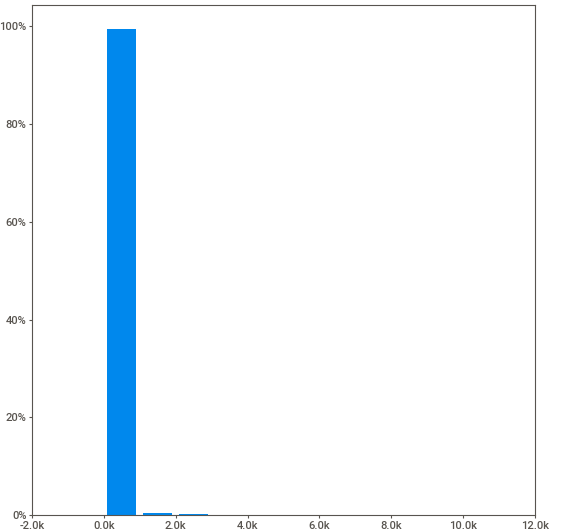
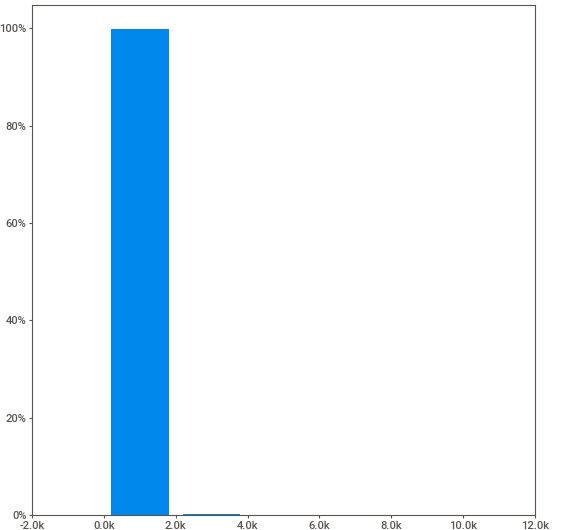
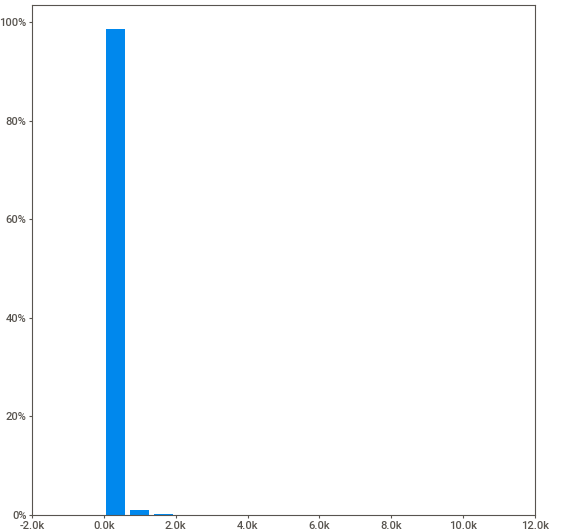
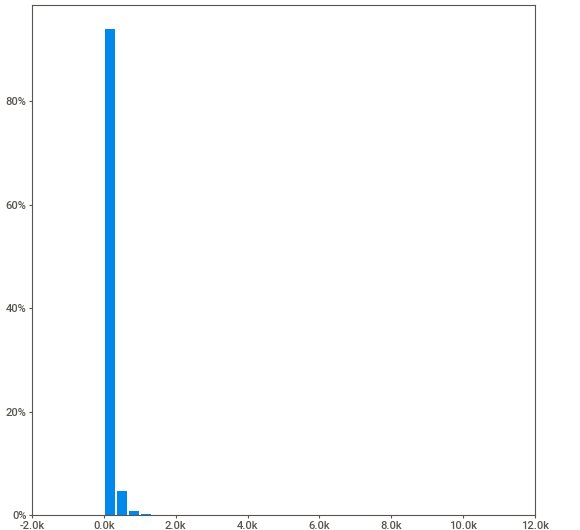
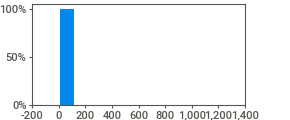
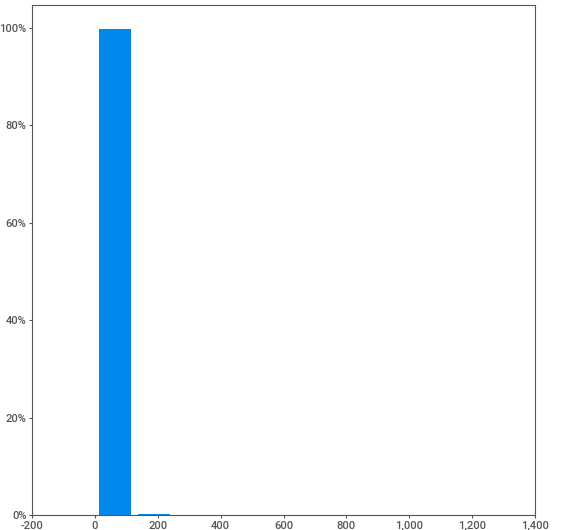
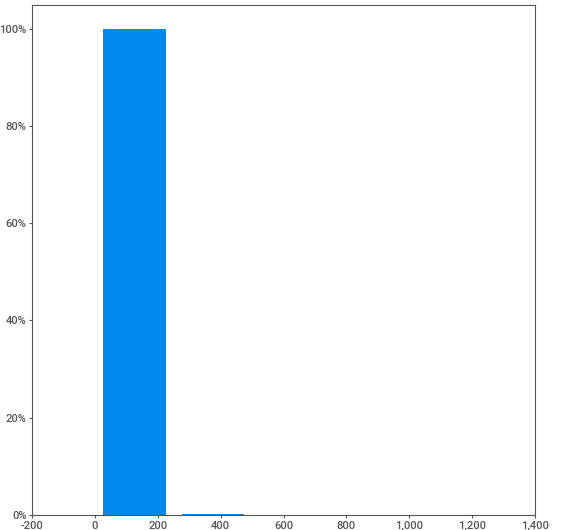
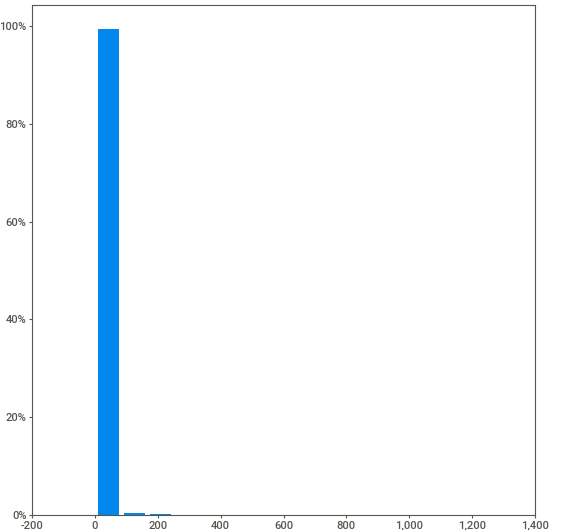
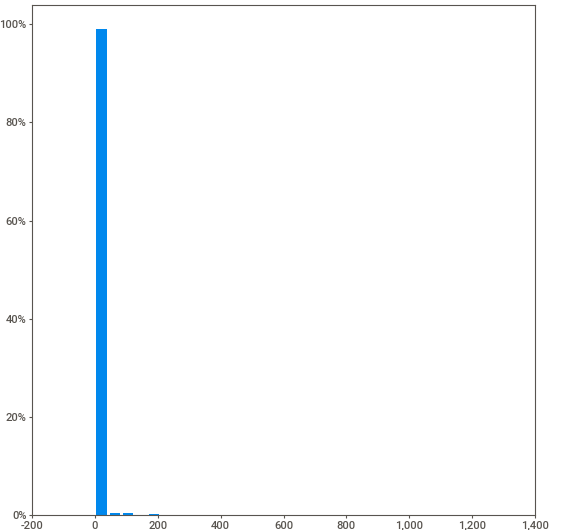
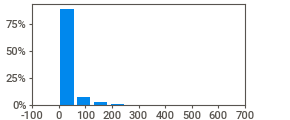
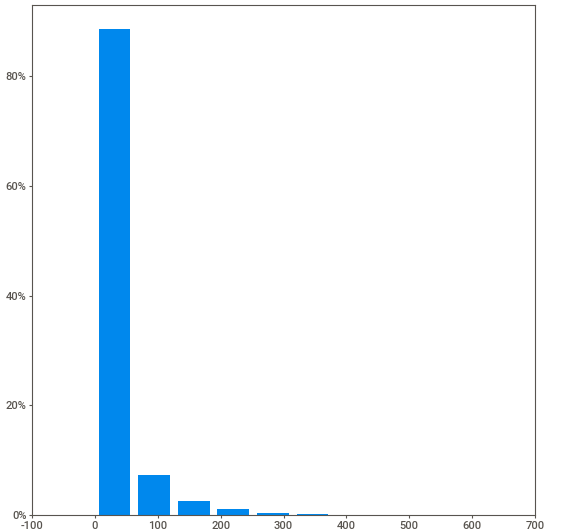
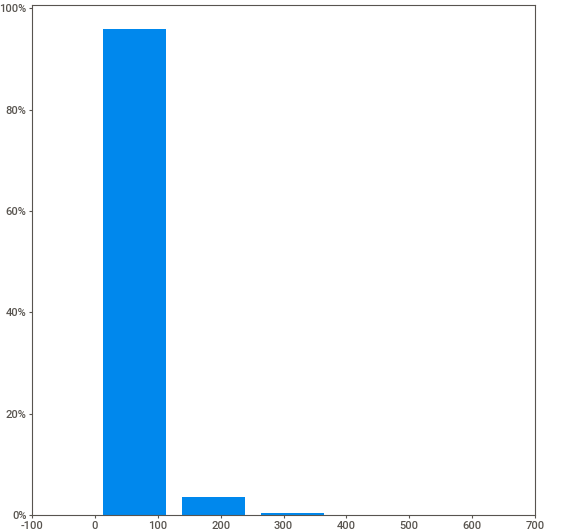
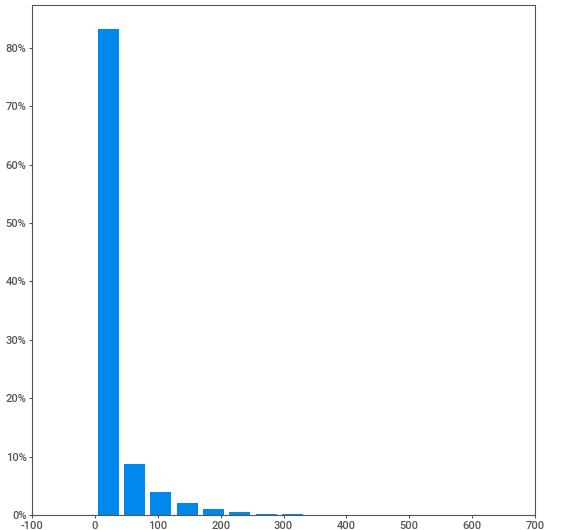
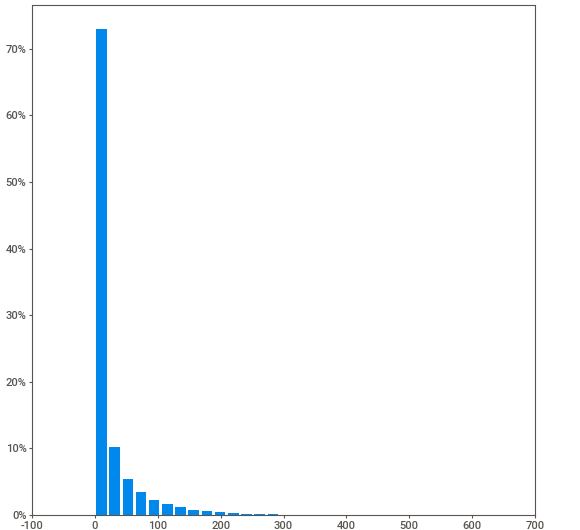
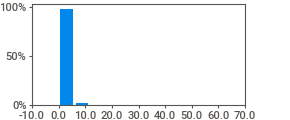
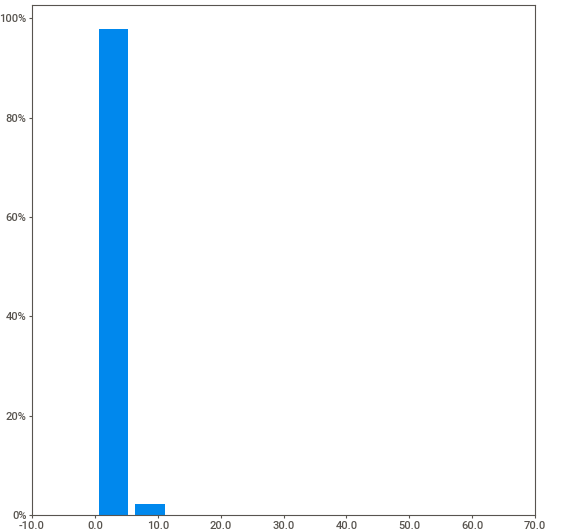
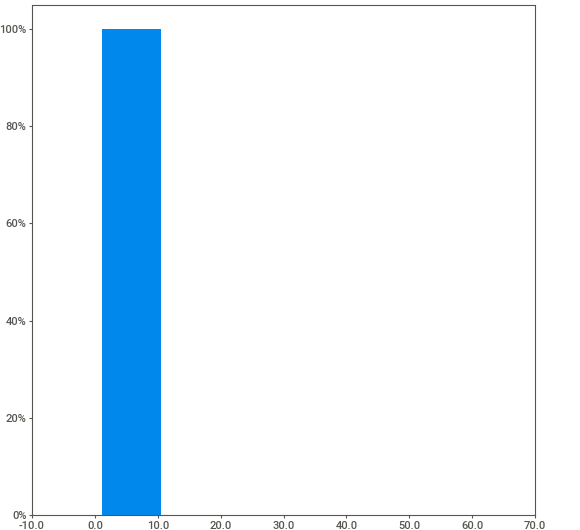
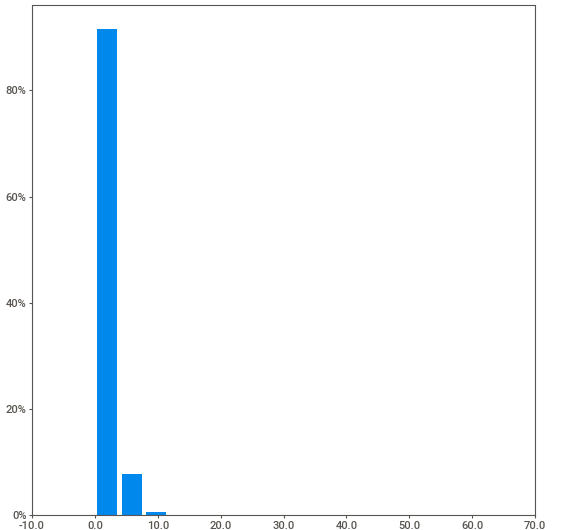
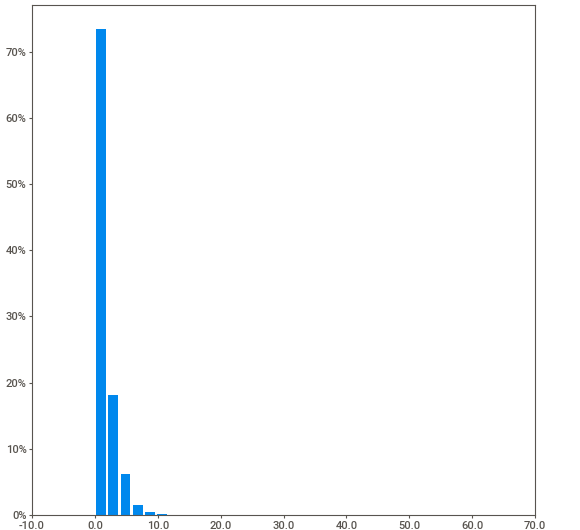
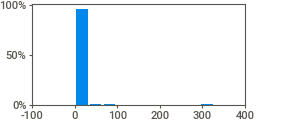
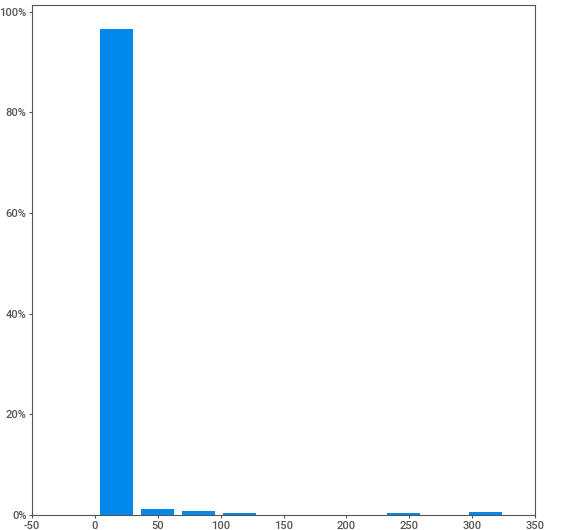
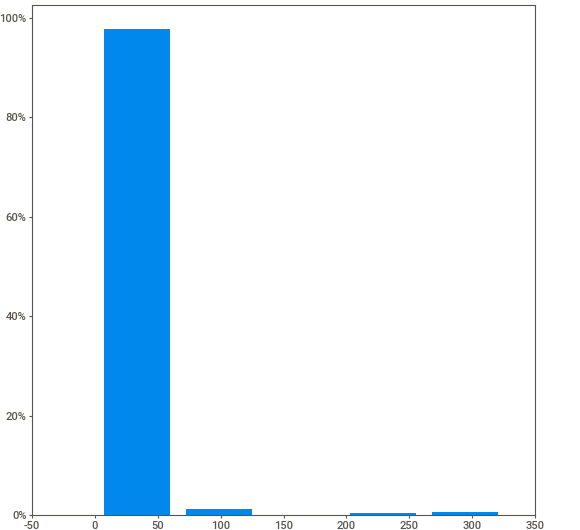
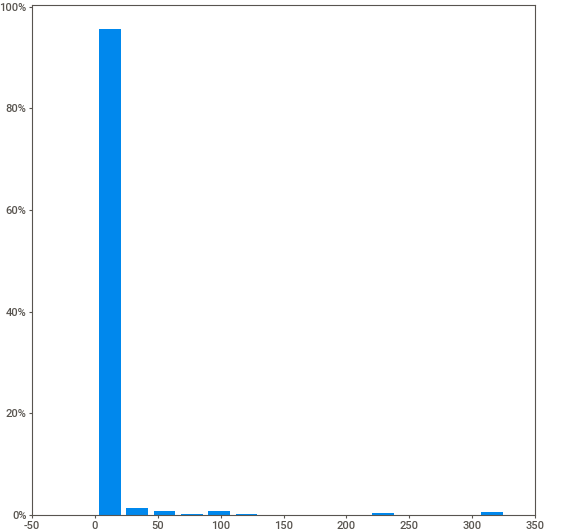
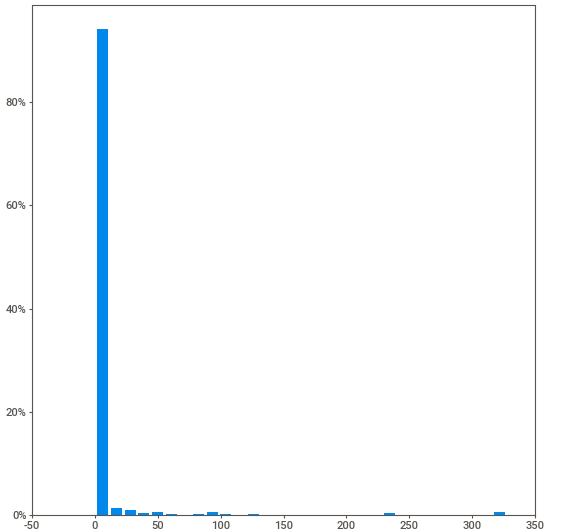
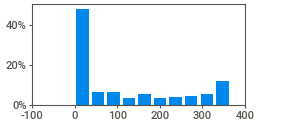
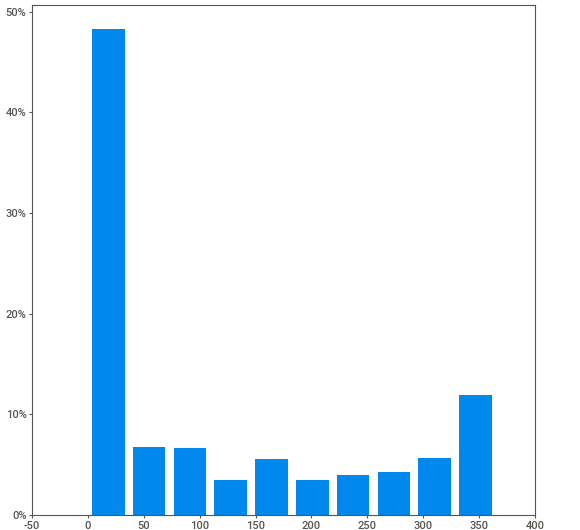
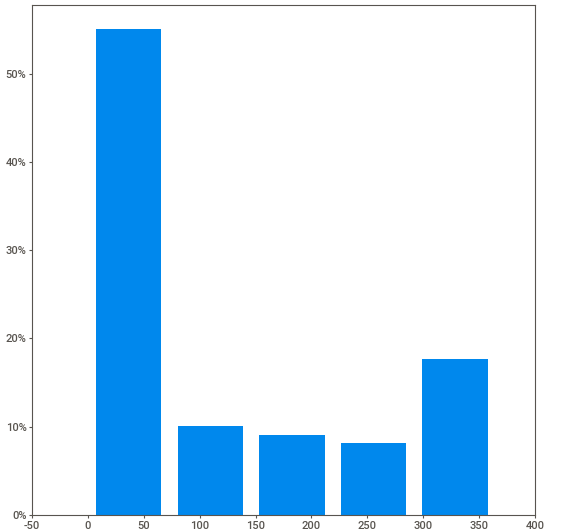
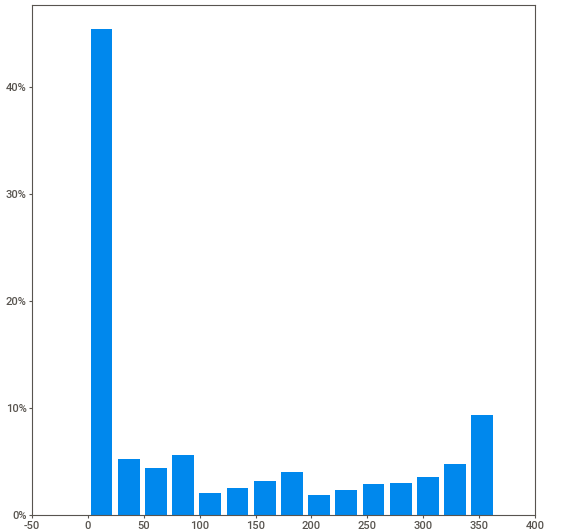
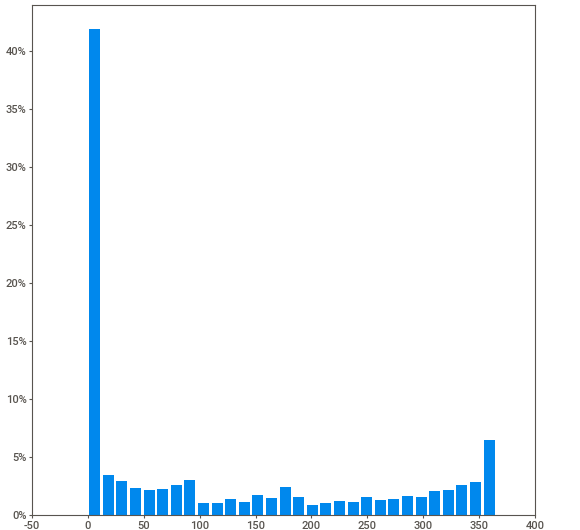
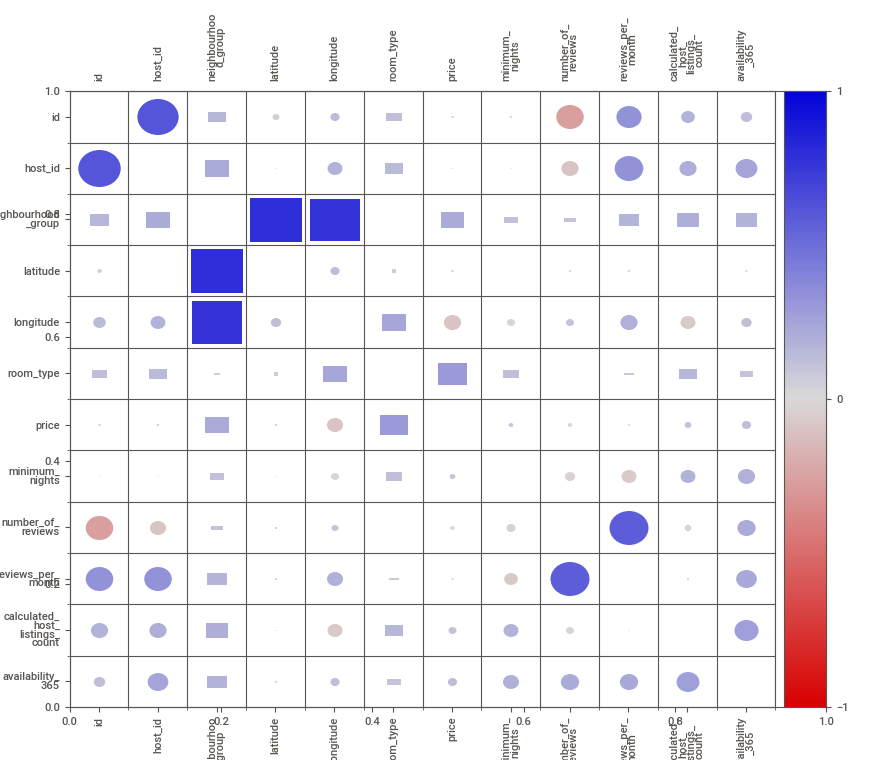
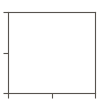

In [15]:
report.show_notebook()

In [1]:
!pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install seaborn
!pip install ydata-profiling
!pip install sweetviz
!pip install autoviz
!pip install dtale


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.0 MB/s eta

In [37]:
!pip install git+https://github.com/AutoViML/Auto_ViML.git
!pip install shap
!pip install xgboost
!pip install catboost

  Cloning https://github.com/AutoViML/Auto_ViML.git to /tmp/pip-req-build-f9id7o8s
  Running command git clone --filter=blob:none --quiet https://github.com/AutoViML/Auto_ViML.git /tmp/pip-req-build-f9id7o8s
  Resolved https://github.com/AutoViML/Auto_ViML.git to commit 9e1fdb07e48d369c80a9366422f5c9bec12d39e3
  Preparing metadata (setup.py) ... done
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviz 0.1.905 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<

In [4]:
import pandas as pd

# Load the dataset
file_path = '/content/unzipped_files/AB_NYC_2019.csv'
data = pd.read_csv(file_path)

In [5]:
print(data.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington     40.65     -73.97   
1     Jennifer           Manhattan       Midtown     40.75     -73.98   
2    Elisabeth           Manhattan        Harlem     40.81     -73.94   
3  LisaRoxanne            Brooklyn  Clinton Hill     40.69     -73.96   
4        Laura           Manhattan   East Harlem     40.80     -73.94   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [6]:
print(data.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [7]:
# Filling missing values - here we'll do simple imputation for demonstration
data.fillna({
    'reviews_per_month': data['reviews_per_month'].median(), # fill with median
    'name': data['name'].mode()[0],  # fill with mode for categorical data
    'host_name': data['host_name'].mode()[0],
    'last_review': data['last_review'].mode()[0]
}, inplace=True)

In [8]:
# Optionally drop non-relevant or ID columns
data.drop(columns=['id', 'host_id', 'name', 'host_name', 'last_review'], inplace=True)

In [9]:
target = 'price'

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
sampled_data = data.sample(frac=0.1, random_state=42)  # Adjust `frac` as needed

# Split the sampled data into training and testing sets
train_sampled, test_sampled = train_test_split(sampled_data, test_size=0.2, random_state=42)

In [12]:
# Drop columns that may not be necessary or are redundant
reduced_data = train_sampled.drop(columns=['host_name', 'last_review'], errors='ignore')

In [13]:
# Handling missing values - Simple imputation
reduced_data.fillna(reduced_data.median(), inplace=True)

In [25]:
!pip install --upgrade scipy==1.9.0
!pip install autoviml==0.1.686

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.0
    Uninstalling scipy-1.11.0:
      Successfully uninstalled scipy-1.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.9.0 which is incompatible.
autoviz 0.1.905 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
imbalanced-ensemble 0.2.0 requires scipy>=1.9.1, but you have scipy 1.9.0 which is i

ERROR: Could not find a version that satisfies the requirement autoviml==0.1.686 (from versions: 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.51, 0.0.651, 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.1.5, 0.1.31, 0.1.32, 0.1.33, 0.1.41, 0.1.42, 0.1.45, 0.1.451, 0.1.452, 0.1.460, 0.1.461, 0.1.462, 0.1.463, 0.1.466, 0.1.467, 0.1.468, 0.1.469, 0.1.470, 0.1.471, 0.1.472, 0.1.474, 0.1.475, 0.1.476, 0.1.477, 0.1.478, 0.1.480, 0.1.481, 0.1.482, 0.1.483, 0.1.484, 0.1.485, 0.1.486, 0.1.488, 0.1.489, 0.1.490, 0.1.491, 0.1.492, 0.1.493, 0.1.494, 0.1.495, 0.1.500, 0.1.501, 0.1.502, 0.1.503, 0.1.504, 0.1.505, 0.1.506, 0.1.507, 0.1.508, 0.1.509, 0.1.510, 0.1.600, 0.1.601, 0.1.602, 0.1.603, 0.1.604, 0.1.605, 0.1.606, 0.1.607, 0.1.608, 0.1.609, 0.1.610, 0.1.611, 0.1.612, 0.1.613, 0.1.614, 0.1.615, 0.1.616, 0.1.617, 0.1.618, 0.1.619, 0.1.620, 0.1.621, 0.1.622, 0.1.623, 0.1.624, 0.1.625, 0.1.626, 0.1.627, 0.1.628, 0.1.629, 0.1.630, 0.1.631, 0.1.632, 0.1.633, 0.1.639, 0.1.650, 0.1.651, 0.1.652, 0.1.653, 

ERROR: Could not find a version that satisfies the requirement autoviml==0.1.686 (from versions: 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.51, 0.0.651, 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.1.5, 0.1.31, 0.1.32, 0.1.33, 0.1.41, 0.1.42, 0.1.45, 0.1.451, 0.1.452, 0.1.460, 0.1.461, 0.1.462, 0.1.463, 0.1.466, 0.1.467, 0.1.468, 0.1.469, 0.1.470, 0.1.471, 0.1.472, 0.1.474, 0.1.475, 0.1.476, 0.1.477, 0.1.478, 0.1.480, 0.1.481, 0.1.482, 0.1.483, 0.1.484, 0.1.485, 0.1.486, 0.1.488, 0.1.489, 0.1.490, 0.1.491, 0.1.492, 0.1.493, 0.1.494, 0.1.495, 0.1.500, 0.1.501, 0.1.502, 0.1.503, 0.1.504, 0.1.505, 0.1.506, 0.1.507, 0.1.508, 0.1.509, 0.1.510, 0.1.600, 0.1.601, 0.1.602, 0.1.603, 0.1.604, 0.1.605, 0.1.606, 0.1.607, 0.1.608, 0.1.609, 0.1.610, 0.1.611, 0.1.612, 0.1.613, 0.1.614, 0.1.615, 0.1.616, 0.1.617, 0.1.618, 0.1.619, 0.1.620, 0.1.621, 0.1.622, 0.1.623, 0.1.624, 0.1.625, 0.1.626, 0.1.627, 0.1.628, 0.1.629, 0.1.630, 0.1.631, 0.1.632, 0.1.633, 0.1.639, 0.1.650, 0.1.651, 0.1.652, 0.1.653, 

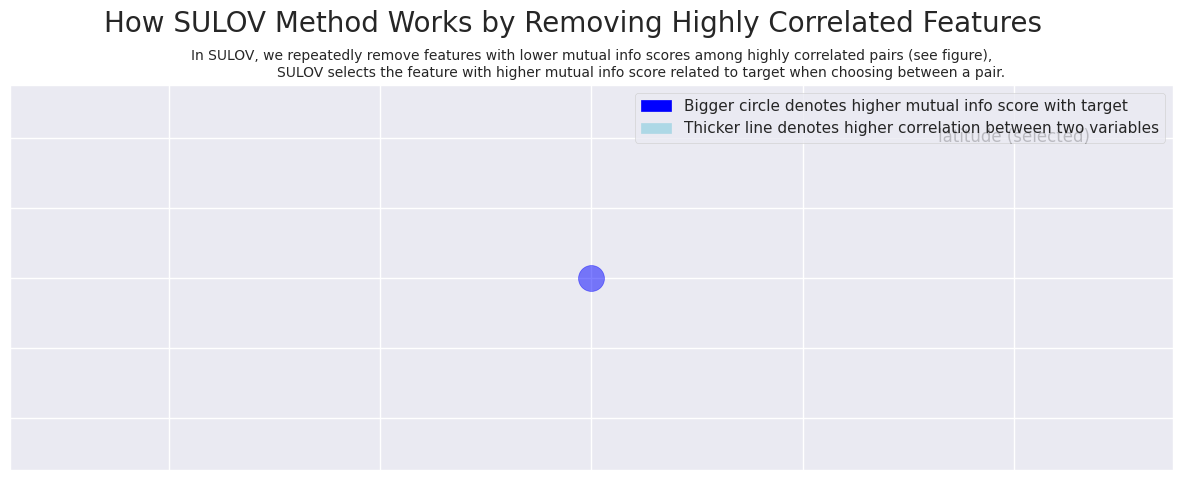

Splitting selected features into float and categorical (integer) variables:
    (3) float variables ...
    (7) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 10 
    Finding Important Features using Boosted Trees algorithm...
        using 10 variables...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 10 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  280 , CV rows =  32
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of tra

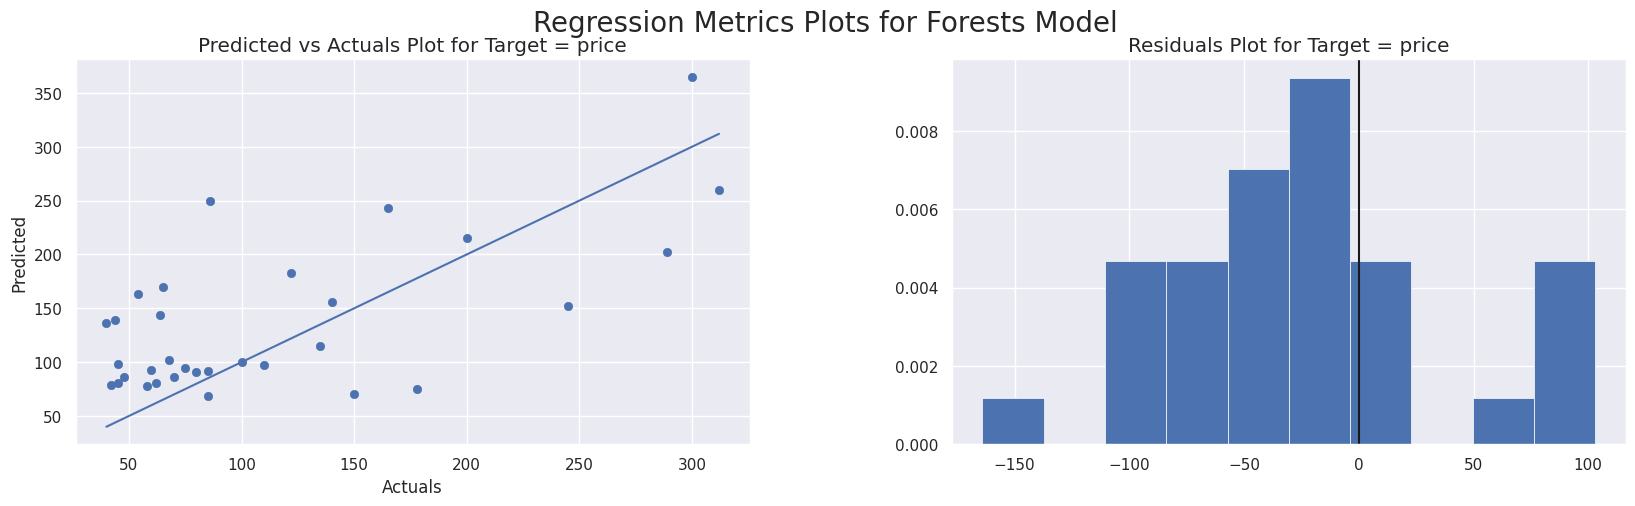

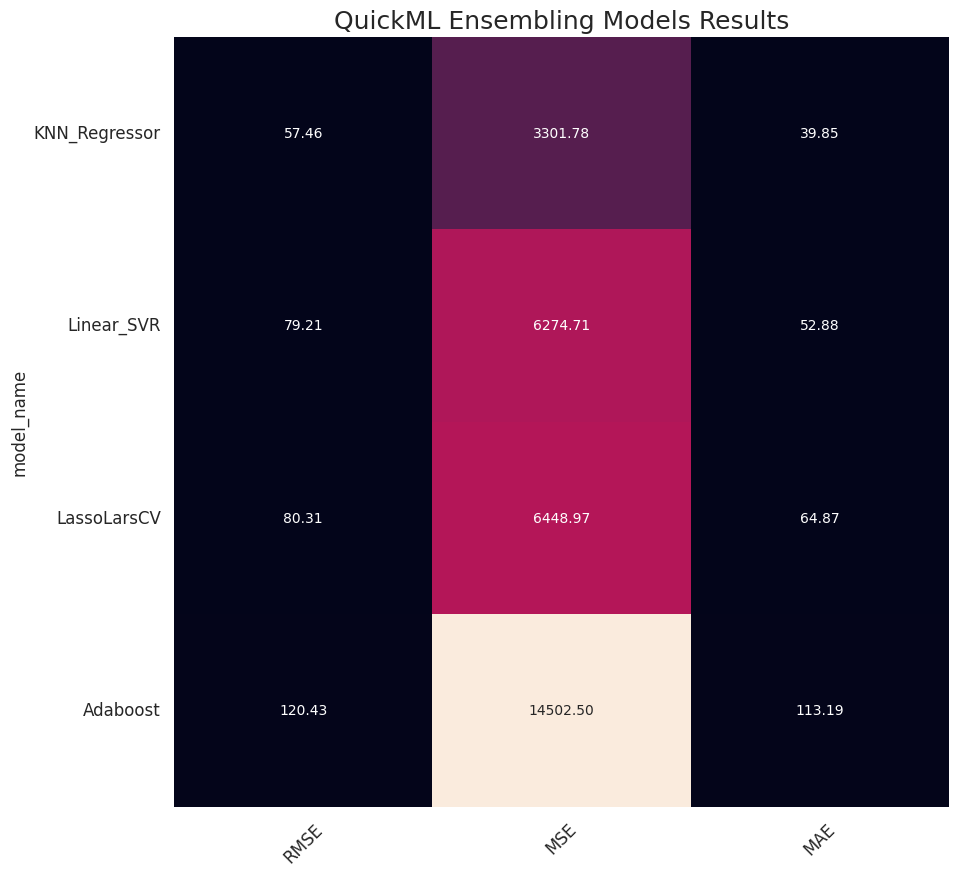

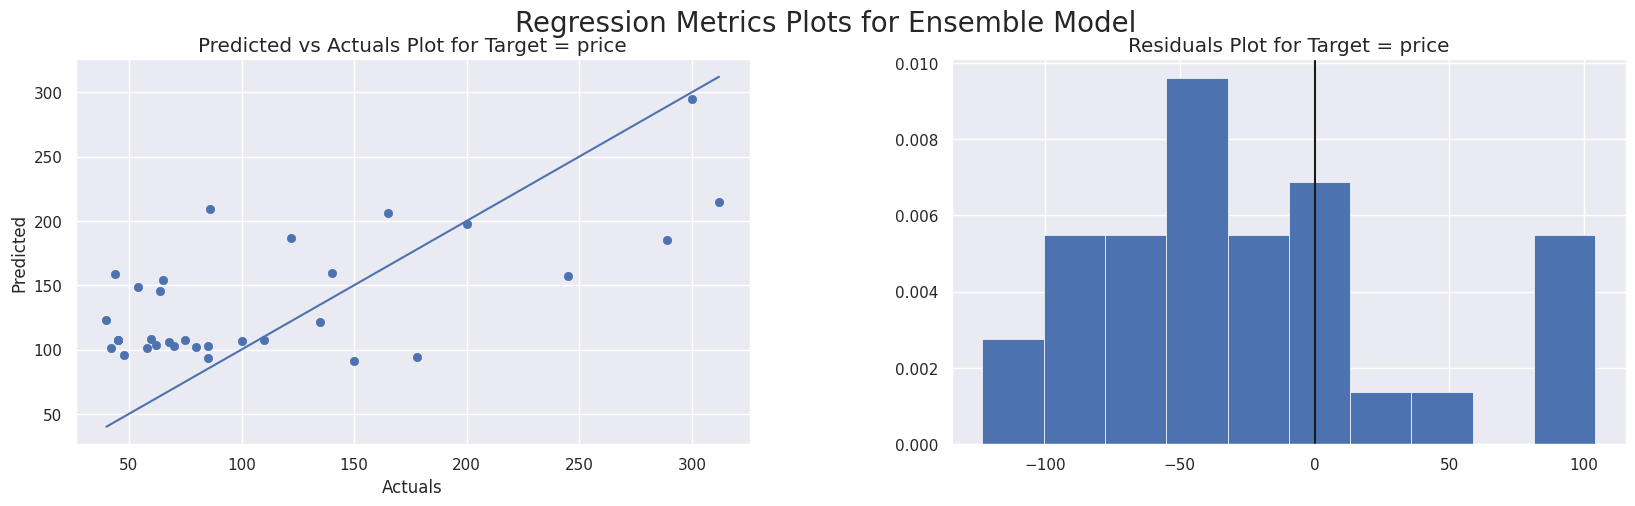

<Figure size 1500x1250 with 0 Axes>

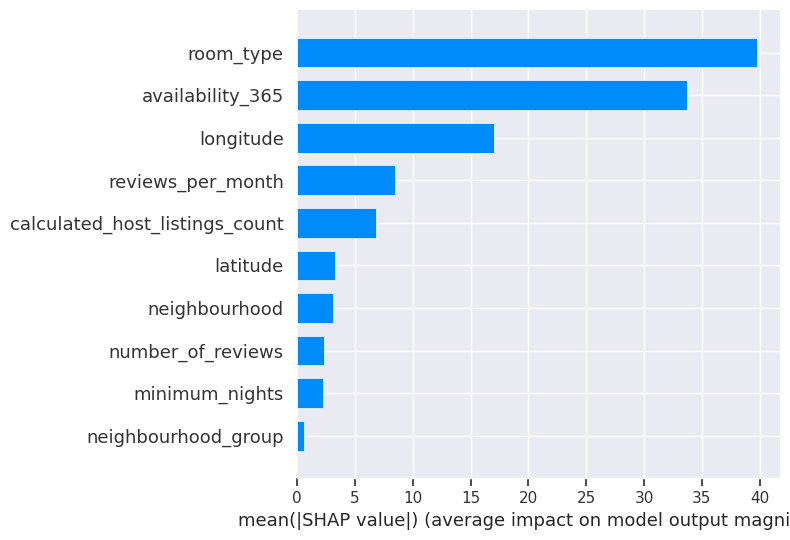

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 109
Writing Output files to disk...
    Saving predictions to ./price/price_Regression_test_modified.csv
    Saving predictions to ./price/price_Regression_submission.csv
    Saving predictions to ./price/price_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 1.8 for the Entire Process


In [14]:
!pip install --upgrade scipy==1.9.0  # Ensure scipy is upgraded to v1.9.0
!pip install autoviml==0.1.686 # Ensure AutoViML is v0.1.686

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from autoviml.Auto_ViML import Auto_ViML

# Assuming 'data' is your original DataFrame
# ...
sampled_data = reduced_data.sample(frac=0.1, random_state=42)  # Adjust `frac` as needed

# Split the sampled data into training and testing sets
train_sampled, test_sampled = train_test_split(sampled_data, test_size=0.2, random_state=42)


# Drop columns that may not be necessary or are redundant
reduced_data = train_sampled.drop(columns=['host_name', 'last_review'], errors='ignore')

# Handling missing values - Simple imputation
reduced_data.fillna(reduced_data.median(), inplace=True)


# Run Auto_ViML on the reduced dataset
model, features, trainm, testm = Auto_ViML(
    train=reduced_data,
    test=test_sampled,
    target='price',
    sample_submission='',
    scoring_parameter='mean_absolute_error',
    KMeans_Featurizer=False,
    hyper_param='RS',
    feature_reduction=True,
    Boosting_Flag=False,
    verbose=2
)

In [15]:
result = model, features, trainm, testm
print(result)

(RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=17,
                      n_estimators=127, n_jobs=-1, random_state=99,
                      warm_start=True), ['availability_365', 'longitude', 'reviews_per_month', 'latitude', 'room_type', 'neighbourhood', 'minimum_nights', 'calculated_host_listings_count', 'number_of_reviews', 'neighbourhood_group'],        availability_365  longitude  reviews_per_month  latitude  room_type  \
27694                 0     -74.01               0.16     40.65          1   
644                  26     -73.93               2.45     40.86          1   
24181               319     -73.87               1.17     40.66          1   
41276               270     -73.97               0.72     40.75          0   
10734               179     -73.88               0.16     40.84          1   
...                 ...        ...                ...       ...        ...   
5245                233     -73.93               1.18     40.86          1